In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler # Used to normalize average_rating, ratings_count

# <font color='black'>Dataset Content:</font>
This dataset is... (Write summary here) 

The dataset has 11127 unique entries, and contains the following 13 fields:
* **Book Id** Contains the unique ID for each book
* **Title**
* **Author**
* **average_rating**
* **isbn**
* **isbn13**
* **language_code**
* **num_pages**
* **ratings_count**
* **text_reviews_count**
* **publication_date**
* **publisher**
* **genres**

In [2]:
df = pd.read_csv("Goodreads_books_with_genres.csv")
df.head(10)

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Chil..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Adve..."
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books,Fiction
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Chil..."
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books,Science Fiction;Fiction;Humor;Fantasy;Classics...
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books,Science Fiction;Fiction;Humor;Fantasy;Classics...
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown,Science Fiction;Fiction;Humor;Classics;Fantasy...


In [3]:
df = df.dropna(subset=["genres"]) # Some records have no genres, delete

In [4]:
df.Title.duplicated().sum()

773

In [5]:
df.drop_duplicates(subset="Title", keep="first", inplace=True)

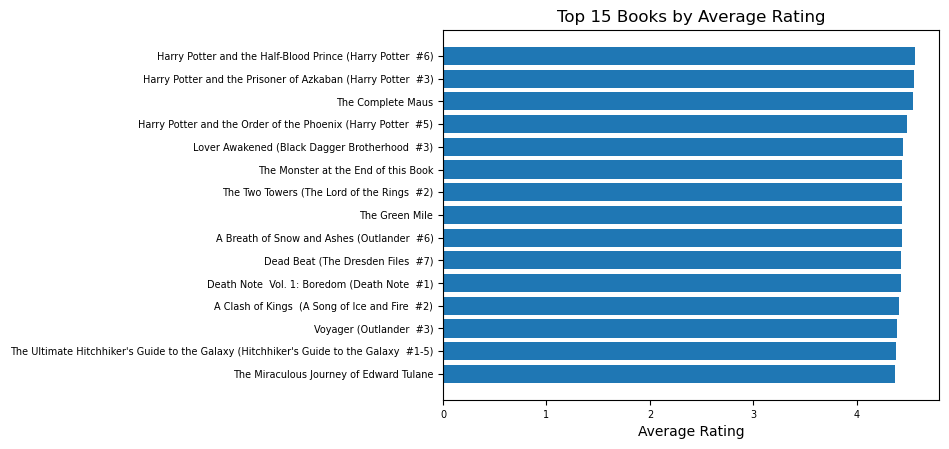

In [6]:
# Highest Rated Books
filtered_df = df[df["text_reviews_count"] >= 2500] # Only books with more than 750 ratings shown
high_rated_books = filtered_df.sort_values(by="average_rating", 
                                           ascending=False)[:15]

plt.barh(high_rated_books["Title"], 
         high_rated_books["average_rating"])
plt.xlabel("Average Rating")
plt.title("Top 15 Books by Average Rating")
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.gca().invert_yaxis()
plt.show()

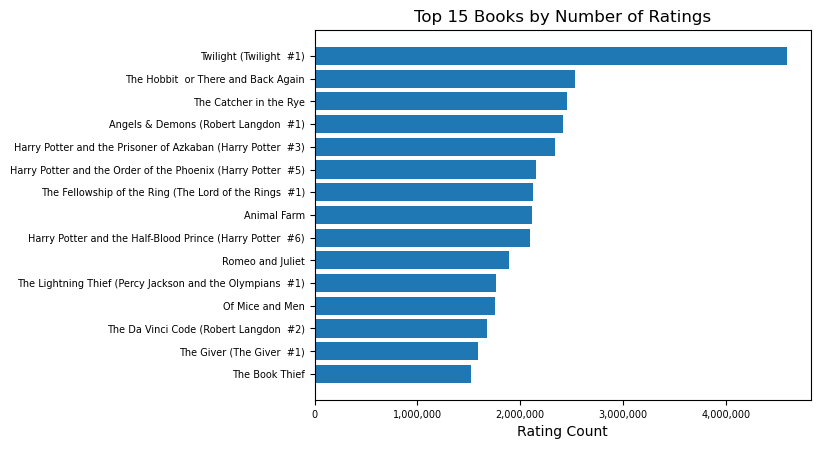

In [7]:
# Highest Number of Ratings
rating_num_books = df.sort_values(by="ratings_count",
                                 ascending=False)[:15]

plt.barh(rating_num_books["Title"], 
         rating_num_books["ratings_count"])
plt.xlabel("Rating Count")
plt.title("Top 15 Books by Number of Ratings")
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter
                                    (lambda x, pos: f'{int(x):,}')) # Display numbers with commas
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.gca().invert_yaxis()
plt.show()

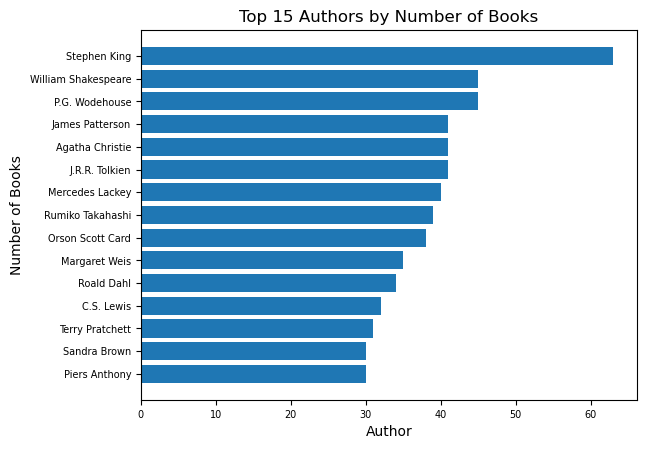

In [8]:
# Top 15 Authors who wrote the most books
df["Author"] = df["Author"].apply(lambda x: x.split("/")[0].strip()) # Taking first author that appears
top_authors = df.groupby("Author").size().sort_values(ascending=False)[:15]
top_authors = top_authors.reset_index(name="book_count") # converting to dataframe

bars = plt.barh(top_authors["Author"], top_authors["book_count"])
plt.title("Top 15 Authors by Number of Books")
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.gca().invert_yaxis()
plt.show()

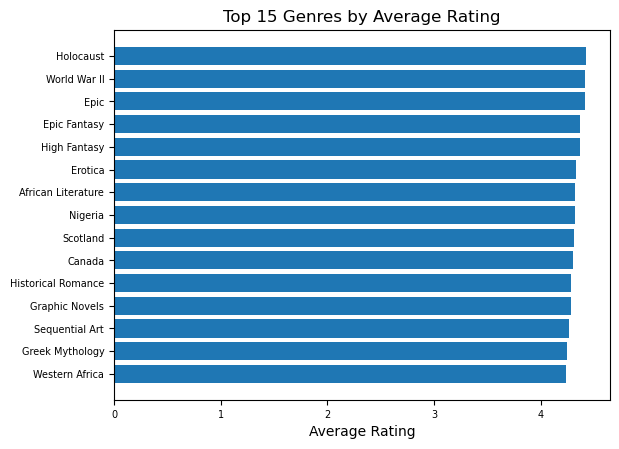

In [9]:
filtered_df = df[df["text_reviews_count"] >= 5000] # Only books with more than 5000 ratings shown
filtered_df.loc[:, 'genres'] = filtered_df["genres"].apply(lambda s: s.replace(";", ",").split(",")) # Converting to list
exploded_df = filtered_df.explode("genres")
average_ratings = exploded_df.groupby("genres")["average_rating"].mean().reset_index()
top_ratings = average_ratings.sort_values(by="average_rating", ascending=False)[:15]

plt.barh(top_ratings["genres"], 
         top_ratings["average_rating"])
plt.xlabel("Average Rating")
plt.title("Top 15 Genres by Average Rating")
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.gca().invert_yaxis()
plt.show()

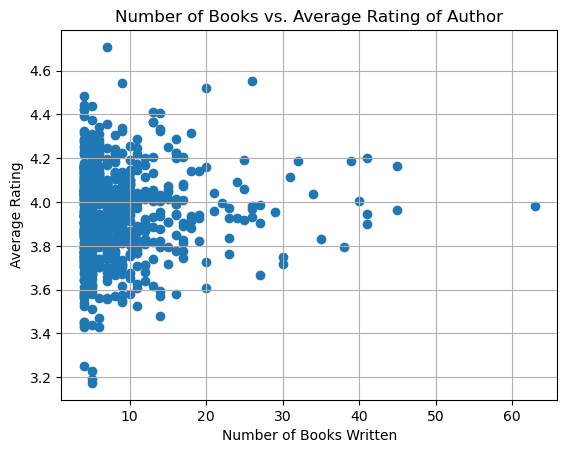

In [10]:
# Display relationship between authors who wrote a number of books and their average rating as an author
author_book_num = df.groupby("Author").size().reset_index(name="book_count")
author_average_rating = df.groupby("Author")["average_rating"].mean().reset_index(name="average_author_rating")
author_stats = pd.merge(author_book_num, author_average_rating, on="Author")
author_stats = author_stats[author_stats["book_count"] > 3] # Only consider authors who wrote more than 3 books

plt.scatter(author_stats["book_count"], author_stats["average_author_rating"])
plt.title("Number of Books vs. Average Rating of Author")
plt.xlabel("Number of Books Written")
plt.ylabel("Average Rating")
plt.grid(True)

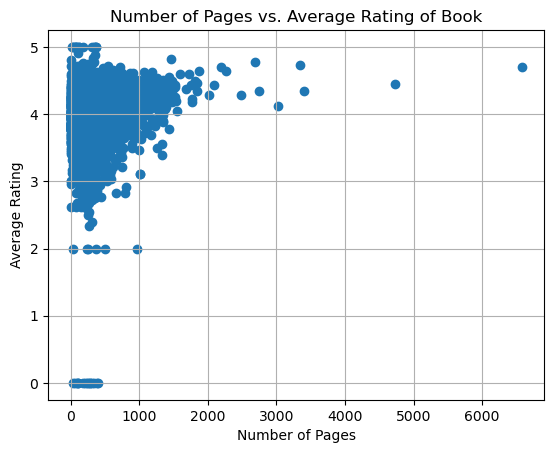

In [11]:
# Display relationship between number of pages of a book and their average rating
plt.scatter(df["num_pages"], df["average_rating"])
plt.title("Number of Pages vs. Average Rating of Book")
plt.xlabel("Number of Pages")
plt.ylabel("Average Rating")
plt.grid(True)

# KNN-Based Recommender System 
1. Convert database into something useable 
- Change genre data into a list like before
- Collect language data

2. Choose a similarity - probably Jaccard similarity 


User inputs the name of a valid book in the database
Returns top 5 book recommendations by average rating that are the most similar to the given book's genres/language code 

In [12]:
data = df.copy()
data.loc[:, "genres"] = data["genres"].apply(lambda s: s.replace(";", ","))
genres = data["genres"].str.get_dummies(",")
genres.head()

,12th Century,13th Century,14th Century,15th Century,16th Century,17th Century,18th Century,1961-1975,19th Century,1st Grade,...,Young Adult Fantasy,Young Adult Historical Fiction,Young Adult Romance,Young Adult Science Fiction,Young Readers,Yuri,Zambia,Zen,Zimbabwe,Zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
languages = data["language_code"].str.get_dummies(",")
languages.head()

,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,glg,...,msa,mul,nl,nor,por,rus,spa,swe,tur,zho
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
features = pd.concat([languages, genres, data["average_rating"], data["ratings_count"]], axis=1)
features.head()

,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,glg,...,Young Adult Romance,Young Adult Science Fiction,Young Readers,Yuri,Zambia,Zen,Zimbabwe,Zombies,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


In [15]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features) # Normalize average_rating, ratings_count

model = NearestNeighbors(n_neighbors=5)
model.fit(features)
distances, idlist = model.kneighbors(features)

In [16]:
def book_recommendation(book_name):
    book_recommendations = []
    book_id = data[data["Title"] == book_name].index[0]
    
    for i in idlist[book_id]:
        book_recommendations.append(data.iloc[i].Title)
    
    return book_recommendations

In [17]:
for book_name in data.Title.values[:20]:
    print("")
    print("Given Book Name: " + book_name)
    
    book_recommendations = book_recommendation(book_name)

    for i in book_recommendations:
        print("Recommendation: " + i)


Given Book Name: Harry Potter and the Half-Blood Prince (Harry Potter  #6)
Recommendation: Harry Potter and the Half-Blood Prince (Harry Potter  #6)
Recommendation: Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Recommendation: Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
Recommendation: Harry Potter and the Goblet of Fire (Harry Potter  #4)
Recommendation: Harry Potter and the Chamber of Secrets (Harry Potter  #2)

Given Book Name: Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Recommendation: Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Recommendation: Harry Potter and the Half-Blood Prince (Harry Potter  #6)
Recommendation: Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
Recommendation: Harry Potter and the Goblet of Fire (Harry Potter  #4)
Recommendation: Harry Potter and the Chamber of Secrets (Harry Potter  #2)

Given Book Name: Harry Potter and the Chamber of Secrets (Harry Potter  #2)
Recommendation: Harry 